# `Abstract :` 

This project mainly focuses on handling imbalanced datasets and detecting credit-card frauds using Following Machine Learning Algorithms:

a) Logistic Regression

b) RandomForestClassifier

c) DecisionTreeClassifier

d) XGBCLassifier

e) KNeighbors Classifier

f) GaussianNB 

These models are fittted to different datasets acquired after StandardScaler, Oversampling, Undersampling and SMOTE techniques.
Thus, separate files are created for each Machine Learning Models so that every datasets acquired after above mentioned techniques are fitted separately to our model using single function.

# `STEP-1:` Importing Libraries & Loading Datasets.

### 1.1 Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### 1.2 Loading Datasets

This datasets have 492 frauds out of 284,807 transactions. It is highly unbalanced, the positive class--1 (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Due to confidentiality issues, the original features are not provided and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.

Feature `Time` contains the seconds elapsed between each transaction and the first transaction in the dataset.But, we did not consider `Time` for training purpose as it is of no use to build the models and may not impact our target variable.

The feature `Amount` is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.

Feature `Class` is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [2]:
main_df = pd.read_csv("csv_files/creditcard.csv")
main_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# `STEP-2:` Data Preprocessing & Preparing Datasets.

Checking for any missing values...

In [3]:
main_df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
main_df.isnull().values.any()

False

Checking info of our datasets...

In [5]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Observing Statistical Distribution of Datasets...

In [6]:
main_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Feature Scaling – Standardizing the `Amount` Column

The `Amount` feature has values with a wide range, which can negatively affect Gradient-based algorithms (like Logistic, KNN, GNB) and gradient-based models.  
To handle this, we apply **StandardScaler** from scikit-learn:

- A copy of the dataset (`temp_df`) is created to preserve the original. 
- It is of no use to build the models and may not impact our target variable.
- The `Amount` column is standardized (mean = 0, standard deviation = 1).  
- Features (`X_scaled`) and target (`y_scaled`) are separated for model training.  
- Final dataset shapes are displayed to confirm the transformation.


In [9]:
from sklearn.preprocessing import StandardScaler
main_df.drop('Time', axis=1, inplace=True)
temp_df = main_df.copy()
standard = StandardScaler()
amount = temp_df['Amount'].values
temp_df['Amount'] = standard.fit_transform(amount.reshape(-1,1))
X_scaled = temp_df.drop('Class', axis=1)
y_scaled = temp_df['Class']
X_scaled.shape, y_scaled.shape

((284807, 29), (284807,))

### Preview of Dataset  

To understand the structure of our dataset, we display the first few rows using  
`main_df.head()`.  
This helps us verify the columns, data types, and an initial sample of the records before performing preprocessing and analysis.  


In [10]:
temp_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


# `STEP-3:` Exploratoty Data Analysis(EDA) & Visualization.

### Class Distribution

We first check the distribution of the target variable **`Class`** to understand the imbalance in the dataset.  
- `0` → Normal transactions  
- `1` → Fraudulent transactions  

The following table shows the count of each class after renaming them for clarity.


In [9]:
class_count_df = pd.DataFrame(main_df['Class'].value_counts().rename_axis('Class').reset_index(name='Counts'))
class_count_df['Class'] = class_count_df['Class'].replace({0: 'Normal', 1: 'Fraud'})
class_count_df.head()


,Class,Counts
0,Normal,284315
1,Fraud,492


## `BAR_GRAPH`

### Class Distribution Visualization  

The bar chart below shows the **frequency of transactions by class**:  
- **Class 0 → Normal transactions**  
- **Class 1 → Fraudulent transactions**  

This helps us clearly see the **imbalance** in the dataset, where fraudulent transactions are significantly fewer than normal ones.  


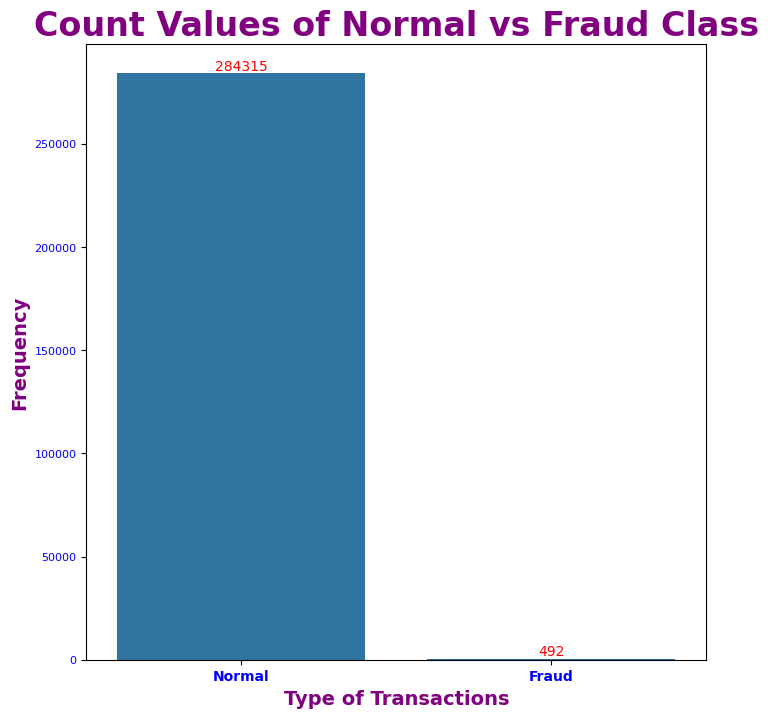

In [12]:
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(8)

ax = sns.barplot(x=class_count_df['Class'], y=class_count_df['Counts'])
ax.bar_label(ax.containers[0], color='red') 

# Fix tick labels
ax.set_xticks(range(len(class_count_df['Class'])))
ax.set_xticklabels(class_count_df['Class'], color='blue', rotation=0, fontsize=10, fontweight='bold')
ax.tick_params(axis='y', labelcolor='blue', labelsize=8)

# Axis labels and title
ax.set_xlabel('Type of Transactions', fontsize=14, fontweight='bold', color='purple')
ax.set_ylabel('Frequency', fontsize=14, fontweight='bold', color='purple')
ax.set_title('Count Values of Normal vs Fraud Class', fontsize=24, fontweight='bold', color='purple')

plt.show()


### Analyzing before plotting graph of Variation of `Amount` per `Class`

### Checking Class Distribution

To understand the balance of our dataset, we separate the transactions into **fraudulent (Class = 1)** and **normal (Class = 0)**.  
This helps us see how many samples belong to each category, which is important because fraud detection datasets are usually highly imbalanced.


In [13]:
fraud = main_df[main_df['Class'] == 1]
normal = main_df[main_df['Class'] == 0]
fraud.shape, normal.shape

((492, 31), (284315, 31))

### Class Imbalance Check  

Before training, it’s important to understand the distribution of classes.  
The following code calculates the **percentage of fraudulent transactions** in the dataset, which highlights the class imbalance problem.


In [14]:
fraud_frc = len(fraud)/float(len(main_df))
print(f"Percentage of Fraud Tnx in datasets : {fraud_frc*100:.2f}%")

Percentage of Fraud Tnx in datasets : 0.17%


In [16]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [17]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

## `HISTOGRAM`

### Variation of Transaction Amount per Class  

The plots below compare the **distribution of transaction amounts** between **fraudulent** and **normal transactions**.  

- The top histogram shows the spread of amounts in **fraudulent transactions**.  
- The bottom histogram shows the spread in **normal transactions**.  
- A logarithmic scale is used on the y-axis to better visualize the imbalance.  

This helps us understand whether fraudulent transactions differ significantly in amount compared to normal ones. 

“The graph compares transaction amounts for fraud and normal cases. Fraud transactions usually involve small amounts, while normal transactions can be both small and large. This shows fraudsters often try small-value transactions to avoid detection.”


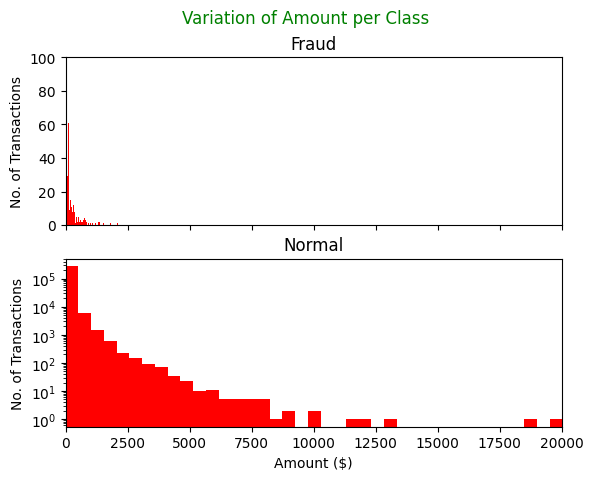

In [18]:
fig, (ax0, ax1) = plt.subplots(nrows=2,
                               ncols=1,
                               sharex=True)
fig.suptitle("Variation of Amount per Class", color='green')
bins=50
ax0.hist(fraud['Amount'], bins=bins, color='red')
ax0.set_title('Fraud')
ax0.set_ylim(0, 100)
ax0.set_ylabel('No. of Transactions')

ax1.hist(normal['Amount'], bins=bins, color='red')
ax1.set_title('Normal')
ax1.set_ylabel('No. of Transactions')

plt.xlim(0, 20000)
plt.xlabel('Amount ($)')
plt.yscale('log')

# `STEP-4:` Model Building , Model Evaluation & Model Comparison



In this step, we train a **Six  model** for fraud detection using a robust pipeline.  

**Workflow:**  
1. **Train-Test Split**  
   - Dataset is split into 80% training and 20% testing.  
   - Stratified split ensures class balance between fraud and non-fraud cases.  

2. **Pipeline Construction**  
   - **StandardScaler** → Normalizes features for better model convergence.  
   - **SMOTE (Synthetic Minority Oversampling Technique)** → Balances the dataset by generating synthetic fraud samples.  
   - **Classifier**: Different machine learning models are used, such as:  
     - Logistic Regression  
     - K-Nearest Neighbors (KNN)  
     - Decision Tree  
     - Random Forest  
     - Naive Bayes  
     - LightGBM    

3. **Model Training**  
   - The pipeline is fitted on the training data.  
   - Model and feature list are saved using `joblib` as  (`model_name.pkl`)** for reuse/deployment.  

4. **Evaluation**  
   - Predictions are made for both **training** and **test** datasets.  
   - **Classification Report** (precision, recall, f1-score) is displayed.  
   - **Confusion Matrix** heatmaps are plotted for both train and test sets.  
   - Accuracy scores are also printed for quick comparison.  

This process helps assess whether Logistic Regression can effectively detect fraudulent transactions, especially focusing on **recall** (catching frauds) while maintaining reasonable precision.  


# 1 LogisticRegression

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

def LR_model(X, y):
    print("Splitting dataset...")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    print("Building pipeline (Scaler + SMOTE + Logistic Regression)...")
    pipeline = Pipeline(steps=[
        ("scaler", StandardScaler()),
        ("smote", SMOTE(random_state=42)),
        ("lr", LogisticRegression(
            class_weight="balanced",   # important for fraud detection
            solver="lbfgs",
            max_iter=1000,
            random_state=42
        ))
    ])

    print("Fitting pipeline...")
    pipeline.fit(X_train, y_train)

    
    joblib.dump({"pipeline": pipeline, "features": X.columns.tolist()}, "lr_model.pkl")
    print("Model pipeline saved as lr_model.pkl")

    
    print("------------ Training Prediction --------------")
    y_train_preds = pipeline.predict(X_train)
    print("Classification Report (Train):\n", classification_report(y_train, y_train_preds))

    cf_matrix_train = confusion_matrix(y_train, y_train_preds)
    plt.figure(figsize=(6,4))
    sns.heatmap(cf_matrix_train, annot=True, cmap='coolwarm', fmt='g')
    plt.title("Confusion Matrix (Logistic Regression - Train)")
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.show()
    print(f"Accuracy (Train): {accuracy_score(y_train, y_train_preds)*100:.2f}%\n")

    
    print("------------ Test Prediction --------------")
    y_test_preds = pipeline.predict(X_test)
    print("Classification Report (Test):\n", classification_report(y_test, y_test_preds))

    cf_matrix = confusion_matrix(y_test, y_test_preds)
    plt.figure(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    plt.title("Confusion Matrix (Logistic Regression - Test)")
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.show()

    print(f"Accuracy (Test): {accuracy_score(y_test, y_test_preds)*100:.2f}%\n")

    return pipeline


### Running the  Model  

Here we separate the dataset into:  
- **Features (`X`)** → All columns except `Class`.  
- **Target (`y`)** → The `Class` column, which indicates whether a transaction is **fraudulent (1)** or **normal (0)**.  

We then pass these to the `LR_model(X, y)` function, which:  
1. Splits the data into training and testing sets.  
2. Applies preprocessing (scaling + SMOTE).  
3. Trains the Logistic Regression model.  
4. Evaluates its performance on both train and test data.  
5. Saves the trained model for later use.  

This step executes the complete pipeline for All the Model


Splitting dataset...
Building pipeline (Scaler + SMOTE + Logistic Regression)...
Fitting pipeline...
Model pipeline saved as lr_model.pkl
------------ Training Prediction --------------
Classification Report (Train):
               precision    recall  f1-score   support

           0       1.00      0.97      0.99    227451
           1       0.06      0.93      0.11       394

    accuracy                           0.97    227845
   macro avg       0.53      0.95      0.55    227845
weighted avg       1.00      0.97      0.99    227845



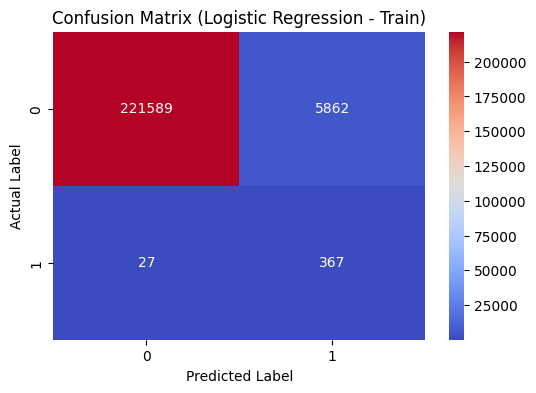

Accuracy (Train): 97.42%

------------ Test Prediction --------------
Classification Report (Test):
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



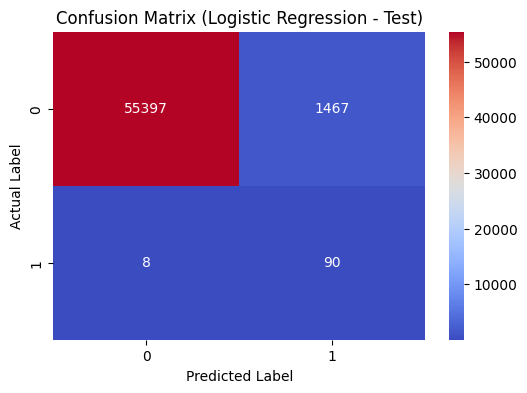

Accuracy (Test): 97.41%



Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('lr',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

In [33]:
X = main_df.drop("Class", axis=1)
y = main_df["Class"]

LR_model(X, y)

#  Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import GaussianNB

def NB_model(X, y):
    print("Splitting dataset...")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    print("Building pipeline (Scaler + SMOTE + Naive Bayes)...")
    pipeline = Pipeline(steps=[
        ("scaler", StandardScaler()),
        ("smote", SMOTE(random_state=42)),
        ("nb", GaussianNB())
    ])

    print("Fitting pipeline...")
    pipeline.fit(X_train, y_train)


    joblib.dump({"pipeline": pipeline, "features": X.columns.tolist()}, "nb_model.pkl")
    print("Model pipeline saved as nb_model.pkl")

    
    print("------------ Training Prediction --------------")
    y_train_preds = pipeline.predict(X_train)
    print("Classification Report (Train):\n", classification_report(y_train, y_train_preds))

    cf_matrix_train = confusion_matrix(y_train, y_train_preds)
    plt.figure(figsize=(6,4))
    sns.heatmap(cf_matrix_train, annot=True, cmap='coolwarm', fmt='g')
    plt.title("Confusion Matrix (Naive Bayes - Train)")
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.show()
    print(f"Accuracy (Train): {accuracy_score(y_train, y_train_preds)*100:.2f}%\n")

    
    print("------------ Test Prediction --------------")
    y_test_preds = pipeline.predict(X_test)
    print("Classification Report (Test):\n", classification_report(y_test, y_test_preds))

    cf_matrix = confusion_matrix(y_test, y_test_preds)
    plt.figure(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    plt.title("Confusion Matrix (Naive Bayes - Test)")
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.show()

    print(f"Accuracy (Test): {accuracy_score(y_test, y_test_preds)*100:.2f}%\n")

    return pipeline


Splitting dataset...
Building pipeline (Scaler + SMOTE + Naive Bayes)...
Fitting pipeline...
Model pipeline saved as nb_model.pkl
------------ Training Prediction --------------
Classification Report (Train):
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    227451
           1       0.06      0.86      0.11       394

    accuracy                           0.98    227845
   macro avg       0.53      0.92      0.55    227845
weighted avg       1.00      0.98      0.99    227845



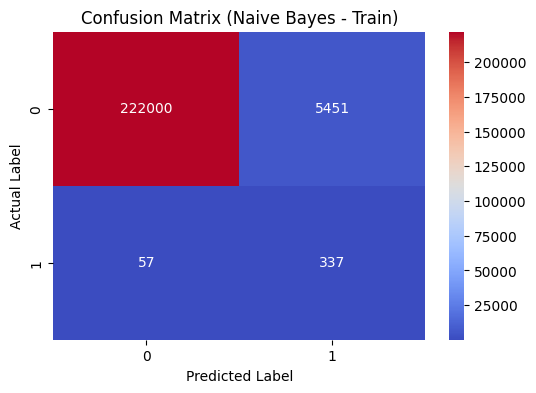

Accuracy (Train): 97.58%

------------ Test Prediction --------------
Classification Report (Test):
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.88      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.97      0.99     56962



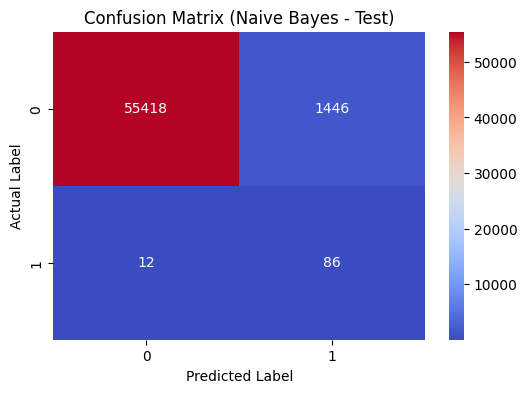

Accuracy (Test): 97.44%



Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('nb', GaussianNB())])

In [35]:
X = main_df.drop("Class", axis=1)
y = main_df["Class"]

NB_model(X, y)

# 3 KNeighborsClassifier

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

def KNN_model(X, y):
    print("Splitting dataset...")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    print("Building pipeline (Scaler + SMOTE + KNN)...")
    pipeline = Pipeline(steps=[
        ("scaler", StandardScaler()),          
        ("smote", SMOTE(random_state=42)),      
        ("knn", KNeighborsClassifier(
            n_neighbors=5,
            n_jobs=-1
        ))
    ])

    print("Fitting pipeline...")
    pipeline.fit(X_train, y_train)

    # Saving Model
    joblib.dump({"pipeline": pipeline, "features": X.columns.tolist()}, "knn_model.pkl")
    print("Model pipeline saved as knn_model.pkl")

    
    print("------------ Training Prediction --------------")
    y_train_preds = pipeline.predict(X_train)
    print("Classification Report (Train):\n", classification_report(y_train, y_train_preds))

    cf_matrix_train = confusion_matrix(y_train, y_train_preds)
    plt.figure(figsize=(6,4))
    sns.heatmap(cf_matrix_train, annot=True, cmap='coolwarm', fmt='g')
    plt.title("Confusion Matrix (KNN - Train)")
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.show()
    print(f"Accuracy (Train): {accuracy_score(y_train, y_train_preds)*100:.2f}%\n")


    print("------------ Test Prediction --------------")
    y_test_preds = pipeline.predict(X_test)
    print("Classification Report (Test):\n", classification_report(y_test, y_test_preds))

    cf_matrix = confusion_matrix(y_test, y_test_preds)
    plt.figure(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    plt.title("Confusion Matrix (KNN - Test)")
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.show()

    print(f"Accuracy (Test): {accuracy_score(y_test, y_test_preds)*100:.2f}%\n")

    return pipeline


Splitting dataset...
Building pipeline (Scaler + SMOTE + KNN)...
Fitting pipeline...
Model pipeline saved as knn_model.pkl
------------ Training Prediction --------------
Classification Report (Train):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.60      1.00      0.75       394

    accuracy                           1.00    227845
   macro avg       0.80      1.00      0.87    227845
weighted avg       1.00      1.00      1.00    227845



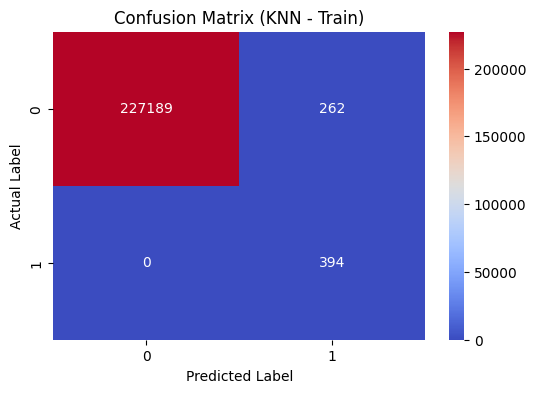

Accuracy (Train): 99.89%

------------ Test Prediction --------------
Classification Report (Test):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.44      0.88      0.58        98

    accuracy                           1.00     56962
   macro avg       0.72      0.94      0.79     56962
weighted avg       1.00      1.00      1.00     56962



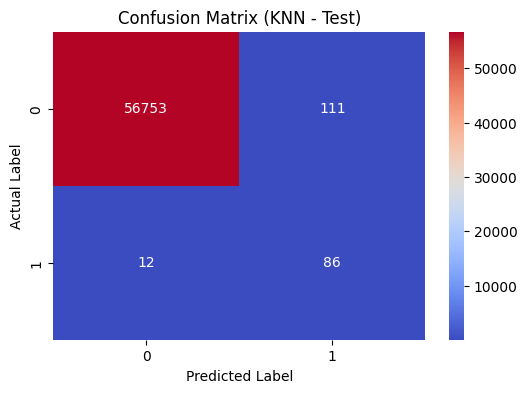

Accuracy (Test): 99.78%



Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('knn', KNeighborsClassifier(n_jobs=-1))])

In [29]:
X = main_df.drop("Class", axis=1)
y = main_df["Class"]

KNN_model(X, y)

# 4 Decision Tree Model

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

def DT_model(X, y):
    print("Splitting dataset...")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    print("Building pipeline (Scaler + SMOTE + Decision Tree)...")
    pipeline = Pipeline(steps=[
        ("scaler", StandardScaler()),  
        ("smote", SMOTE(random_state=42)),
        ("dt", DecisionTreeClassifier(
            criterion="gini",      
            max_depth=None,       
            class_weight="balanced", 
            random_state=42
        ))
    ])

    print("Fitting pipeline...")
    pipeline.fit(X_train, y_train)

    # Saving Model
    joblib.dump({"pipeline": pipeline, "features": X.columns.tolist()}, "dt_model.pkl")
    print("Model pipeline saved as dt_model.pkl")

    # ---- Training Evaluation ----
    print("------------ Training Prediction --------------")
    y_train_preds = pipeline.predict(X_train)
    print("Classification Report (Train):\n", classification_report(y_train, y_train_preds))

    cf_matrix_train = confusion_matrix(y_train, y_train_preds)
    plt.figure(figsize=(6,4))
    sns.heatmap(cf_matrix_train, annot=True, cmap='coolwarm', fmt='g')
    plt.title("Confusion Matrix (Decision Tree - Train)")
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.show()
    print(f"Accuracy (Train): {accuracy_score(y_train, y_train_preds)*100:.2f}%\n")

    # ---- Test Evaluation ----
    print("------------ Test Prediction --------------")
    y_test_preds = pipeline.predict(X_test)
    print("Classification Report (Test):\n", classification_report(y_test, y_test_preds))

    cf_matrix = confusion_matrix(y_test, y_test_preds)
    plt.figure(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    plt.title("Confusion Matrix (Decision Tree - Test)")
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.show()

    print(f"Accuracy (Test): {accuracy_score(y_test, y_test_preds)*100:.2f}%\n")

    return pipeline


Splitting dataset...
Building pipeline (Scaler + SMOTE + Decision Tree)...
Fitting pipeline...
Model pipeline saved as dt_model.pkl
------------ Training Prediction --------------
Classification Report (Train):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



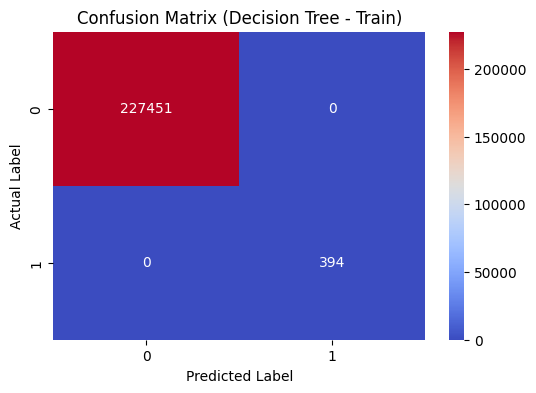

Accuracy (Train): 100.00%

------------ Test Prediction --------------
Classification Report (Test):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.39      0.79      0.53        98

    accuracy                           1.00     56962
   macro avg       0.70      0.89      0.76     56962
weighted avg       1.00      1.00      1.00     56962



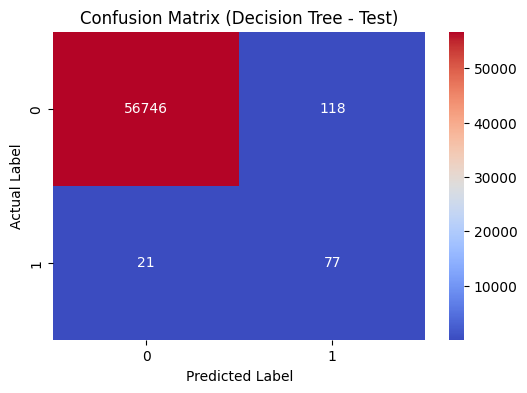

Accuracy (Test): 99.76%



Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('dt',
                 DecisionTreeClassifier(class_weight='balanced',
                                        random_state=42))])

In [39]:
X = main_df.drop("Class", axis=1)
y = main_df["Class"]

DT_model(X, y)

# 5 Random Forest Model

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

def RF_model(X, y):
    print("Splitting dataset...")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    
    print("Building pipeline (SMOTE + Random Forest)...")
    pipeline = Pipeline(steps=[
        ("smote", SMOTE(random_state=42)),
        ("rf", RandomForestClassifier(
            n_estimators=200,
            class_weight="balanced",  
            random_state=42,
            n_jobs=-1
        ))
    ])

    print("Fitting pipeline...")
    pipeline.fit(X_train, y_train)

    # Saving Model
    joblib.dump({"pipeline": pipeline, "features": X.columns.tolist()}, "RF_model.pkl")
    print("Model pipeline saved as RF_model.pkl")

    # ---- Training Evaluation ----
    print("------------ Training Prediction --------------")
    y_train_preds = pipeline.predict(X_train)
    print("Classification Report (Train):\n", classification_report(y_train, y_train_preds))

    cf_matrix_train = confusion_matrix(y_train, y_train_preds)
    plt.figure(figsize=(6,4))
    sns.heatmap(cf_matrix_train, annot=True, cmap='coolwarm', fmt='g')
    plt.title("Confusion Matrix (Train)")
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.show()
    print(f"Accuracy (Train): {accuracy_score(y_train, y_train_preds)*100:.2f}%\n")

    # ---- Test Evaluation ----
    print("------------ Test Prediction --------------")
    y_test_preds = pipeline.predict(X_test)
    print("Classification Report (Test):\n", classification_report(y_test, y_test_preds))

    cf_matrix = confusion_matrix(y_test, y_test_preds)
    plt.figure(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    plt.title("Confusion Matrix (Random Forest - Test)")
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.show()

    print(f"Accuracy (Test): {accuracy_score(y_test, y_test_preds)*100:.2f}%\n")

    return pipeline


Splitting dataset...
Building pipeline (SMOTE + Random Forest)...
Fitting pipeline...
Model pipeline saved as RF_model.pkl
------------ Training Prediction --------------
Classification Report (Train):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



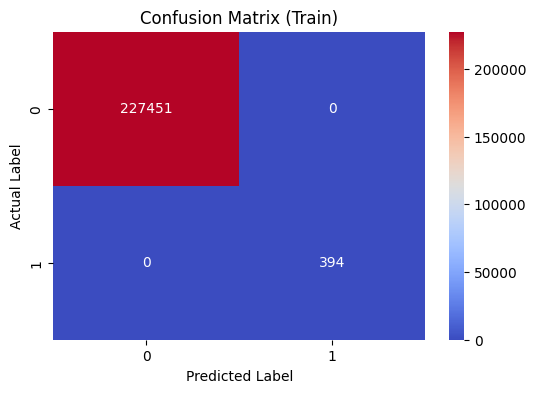

Accuracy (Train): 100.00%

------------ Test Prediction --------------
Classification Report (Test):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.83      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962



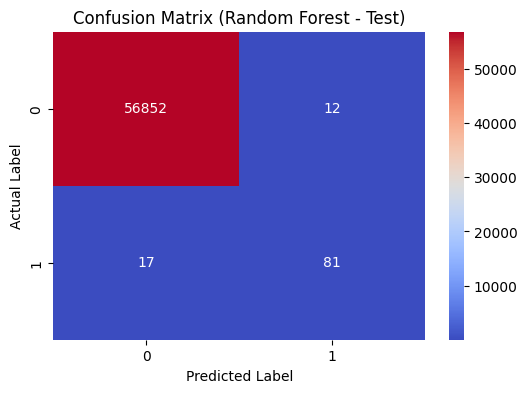

Accuracy (Test): 99.95%



Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('rf',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, n_jobs=-1,
                                        random_state=42))])

In [22]:

X = main_df.drop("Class", axis=1)
y = main_df["Class"]

RF_model(X, y)

# 6 XGBoost Model

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier

def XGB_model(X, y):
    print("Splitting dataset...")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    print("Building pipeline (SMOTE + XGBoost)...")
    pipeline = Pipeline(steps=[
        ("smote", SMOTE(random_state=42)),
        ("xgb", XGBClassifier(
            n_estimators=200,
            learning_rate=0.1,
            max_depth=6,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42,
            use_label_encoder=False,
            eval_metric="logloss",
            scale_pos_weight=(len(y_train[y_train==0]) / len(y_train[y_train==1]))  # important for imbalance
        ))
    ])

    print("Fitting pipeline...")
    pipeline.fit(X_train, y_train)

    joblib.dump({"pipeline": pipeline, "features": X.columns.tolist()}, "XGB_model.pkl")
    print("Model pipeline saved as XGB_model.pkl")

    # ---- Training Evaluation ----
    print("------------ Training Prediction --------------")
    y_train_preds = pipeline.predict(X_train)
    print("Classification Report (Train):\n", classification_report(y_train, y_train_preds))

    cf_matrix_train = confusion_matrix(y_train, y_train_preds)
    plt.figure(figsize=(6,4))
    sns.heatmap(cf_matrix_train, annot=True, cmap='coolwarm', fmt='g')
    plt.title("Confusion Matrix (Train)")
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.show()
    print(f"Accuracy (Train): {accuracy_score(y_train, y_train_preds)*100:.2f}%\n")

    # ---- Test Evaluation ----
    print("------------ Test Prediction --------------")
    y_test_preds = pipeline.predict(X_test)
    print("Classification Report (Test):\n", classification_report(y_test, y_test_preds))

    cf_matrix = confusion_matrix(y_test, y_test_preds)
    plt.figure(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    plt.title("Confusion Matrix (XGBoost - Test)")
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.show()

    print(f"Accuracy (Test): {accuracy_score(y_test, y_test_preds)*100:.2f}%\n")

    return pipeline 


Splitting dataset...
Building pipeline (SMOTE + XGBoost)...
Fitting pipeline...


c:\Users\SHOEB KHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:20:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model pipeline saved as XGB_model.pkl
------------ Training Prediction --------------
Classification Report (Train):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.72      1.00      0.83       394

    accuracy                           1.00    227845
   macro avg       0.86      1.00      0.92    227845
weighted avg       1.00      1.00      1.00    227845



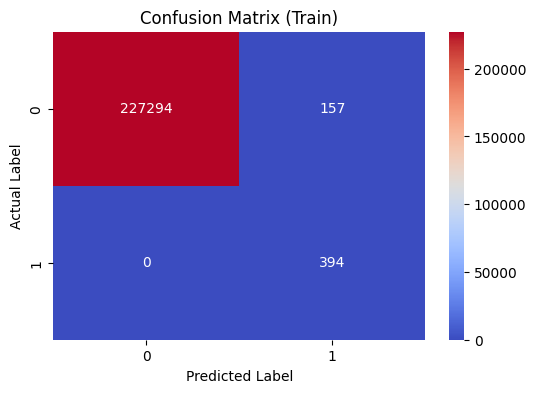

Accuracy (Train): 99.93%

------------ Test Prediction --------------
Classification Report (Test):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.47      0.89      0.61        98

    accuracy                           1.00     56962
   macro avg       0.73      0.94      0.80     56962
weighted avg       1.00      1.00      1.00     56962



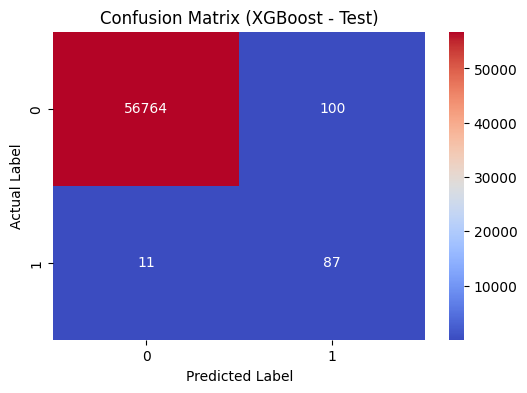

Accuracy (Test): 99.81%



Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.8, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [24]:
X = main_df.drop("Class", axis=1)
y = main_df["Class"]

XGB_model(X, y)

# comparison of All Models

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

def evaluate_model(saved_model_path, X_test, y_test, model_name):
    
    saved = joblib.load(saved_model_path)
    pipeline = saved["pipeline"]   # load pipeline
    y_pred = pipeline.predict(X_test)

    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    }

def compare_all_models(X, y):
    # Split once (must match your training split: same stratify + random_state)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    results = []

    # Load & Evaluate Each Model
    results.append(evaluate_model("knn_model.pkl", X_test, y_test, "KNN"))
    results.append(evaluate_model("rf_model.pkl", X_test, y_test, "Random Forest"))
    results.append(evaluate_model("XGB_model.pkl", X_test, y_test, "XGBoost"))
    results.append(evaluate_model("lr_model.pkl", X_test, y_test, "Logistic Regression"))
    results.append(evaluate_model("nb_model.pkl", X_test, y_test, "Naive Bayes"))

    # Create Comparison Table 
    results_df = pd.DataFrame(results)
    print("\nModel Comparison Table:\n")
    print(results_df)

    #  Plot Graph 
    results_df.set_index("Model", inplace=True)
    results_df.plot(kind="bar", figsize=(12,6))
    plt.title("Model Performance Comparison")
    plt.ylabel("Score")
    plt.ylim(0,1)   
    plt.xticks(rotation=0)
    plt.legend(loc="lower right")
    plt.show()

    return results_df




c:\Users\SHOEB KHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Model Comparison Table:

                 Model  Accuracy  Precision    Recall  F1-Score
0                  KNN  0.997841   0.436548  0.877551  0.583051
1        Random Forest  0.999298   0.837209  0.734694  0.782609
2              XGBoost  0.998051   0.465241  0.887755  0.610526
3  Logistic Regression  0.974106   0.057803  0.918367  0.108761
4          Naive Bayes  0.974404   0.056136  0.877551  0.105521


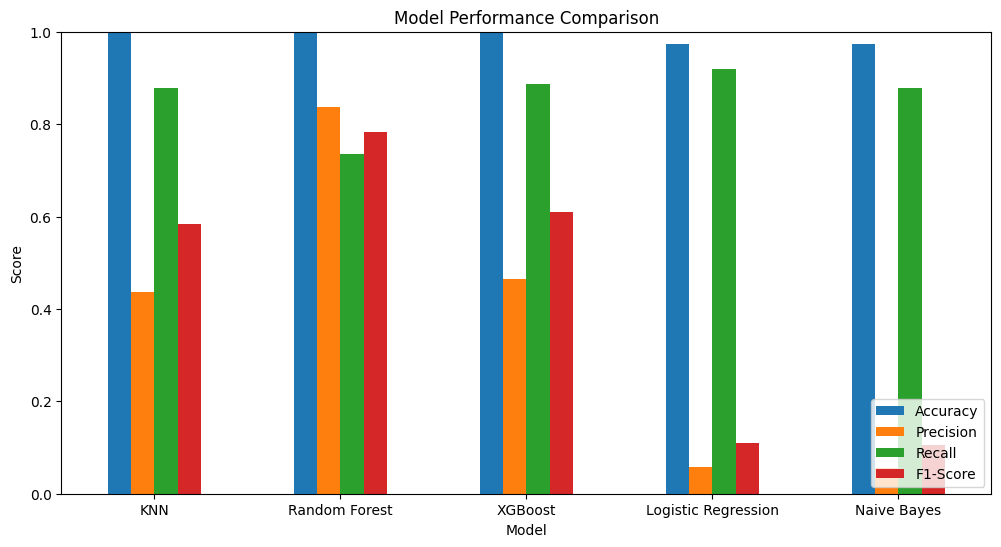

In [44]:

results = compare_all_models(X, y)
